# This code uses PYTHON.csv and AIMLnew.csv placed in the same directory as this ipynb file.

## Software and libraries used:
    1. pandas
    2. numpy
    3. dask
    4. re
    5. gensim
    6. scipy
    7. sklearn
    8. nltk

In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd

In [2]:
corpus_train=pd.read_csv('PYTHON.csv',encoding='latin1')
corpus_train.columns=['ParentId','Title','Body','Body_Ans1','Body_Ans2','Body_Ans3','Body_Ans4','Body_Ans5','blank1','blank2','blank3']
print('Shape=>',corpus_train.shape)
corpus_train.head()

Shape=> (68406, 11)


C:\Users\anush\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (0,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ParentId,Title,Body,Body_Ans1,Body_Ans2,Body_Ans3,Body_Ans4,Body_Ans5,blank1,blank2,blank3
0,11060,How should I unit test a code-generator?,This is a difficult and open-ended question I ...,Unit testing is just that testing a specific u...,My recommendation would be to figure out a set...,I find that you need to test what you're gener...,"Recall that ""unit testing"" is only one kind of...",If you are running on *nux you might consider ...,NaN,NaN,NaN
1,17250,Create an encrypted ZIP file in Python,I'm creating an ZIP file with ZipFile in Pytho...,The duplicate question http://stackoverflow.co...,You can use the Chilkat library. It's commerc...,I created a simple library to create a passwor...,NaN,NaN,NaN,NaN,NaN
2,19030,How to check set of files conform to a naming ...,"I have a bunch of files (TV episodes, although...",\n I want to add a rule that checks for\n th...,maybe you should take the approach of defaulti...,NaN,NaN,NaN,NaN,NaN,NaN
3,31340,"How do threads work in Python, and what are co...",I've been trying to wrap my head around how th...,"Yes, because of the Global Interpreter Lock (G...","Python's a fairly easy language to thread in, ...",Below is a basic threading sample. It will spa...,One easy solution to the GIL is the multiproce...,Try to remember that the GIL is set to poll ar...,NaN,NaN,NaN
4,34020,Are Python threads buggy?,A reliable coder friend told me that Python's ...,The standard implementation of Python (general...,"As far as I know there are no real bugs, but t...",Python threads are good for concurrent I/O pro...,The GIL (Global Interpreter Lock) might be a p...,If you want to code in python and get great th...,NaN,NaN,NaN


In [3]:
corpus_train.drop('Body',  axis='columns', inplace=True)
corpus_train.drop('Body_Ans3',  axis='columns', inplace=True)
corpus_train.drop('Body_Ans4',  axis='columns', inplace=True)
corpus_train.drop('Body_Ans5',  axis='columns', inplace=True)
corpus_train.drop('blank1',  axis='columns', inplace=True)
corpus_train.drop('blank2',  axis='columns', inplace=True)
corpus_train.drop('blank3',  axis='columns', inplace=True)
corpus_train.dropna(subset=['Body_Ans1', 'Body_Ans2'], inplace=True)

In [4]:
corpus=corpus_train.sample(n=10000,random_state=42).reset_index(drop=True)
print('Shape=>',corpus.shape)
corpus.head()

Shape=> (10000, 4)


,ParentId,Title,Body_Ans1,Body_Ans2
0,4359490,print function in Python,"print ' '.join('%s=%s' % (k, v) for (v, k) in ...","for x,y in input: \n print ""%s=%s"" % (y, x)..."
1,34828320,How to convert variable into integer in python...,Simple answer is to use ord().\n\n&gt;&gt;&gt;...,You can use the struct module for fixed-length...
2,13959510,Python list initialization using multiple rang...,You can use itertools.chain to flatten the out...,"Try this for Python 2.x:\n\n range(1,6) + rang..."
3,38606290,Looping through HTML tags using BeautifulSoup,After the loop you are getting only one value...,The problem is in the line: writer.writerow( (...
4,26853860,Get an array back from an itertools.chain object,If your ultimate goal is to get a Numpy array ...,list. If you do list(chain) it should work. Bu...


In [5]:
# Creating Training Set of answers
training_corpus=corpus.iloc[:8000]
print('Shape=>',training_corpus.shape)
training_corpus.head()

Shape=> (8000, 4)


,ParentId,Title,Body_Ans1,Body_Ans2
0,4359490,print function in Python,"print ' '.join('%s=%s' % (k, v) for (v, k) in ...","for x,y in input: \n print ""%s=%s"" % (y, x)..."
1,34828320,How to convert variable into integer in python...,Simple answer is to use ord().\n\n&gt;&gt;&gt;...,You can use the struct module for fixed-length...
2,13959510,Python list initialization using multiple rang...,You can use itertools.chain to flatten the out...,"Try this for Python 2.x:\n\n range(1,6) + rang..."
3,38606290,Looping through HTML tags using BeautifulSoup,After the loop you are getting only one value...,The problem is in the line: writer.writerow( (...
4,26853860,Get an array back from an itertools.chain object,If your ultimate goal is to get a Numpy array ...,list. If you do list(chain) it should work. Bu...


In [6]:
# Creating Testing Set of answers
testing_corpus=corpus.iloc[8000:]
print('Shape=>',testing_corpus.shape)
testing_corpus.head()

Shape=> (2000, 4)


,ParentId,Title,Body_Ans1,Body_Ans2
8000,25227640,Mixing default arguments in Python 2.x,"In Python2:\n\ndef bla(*args, **kwargs):\n ...","In Python2:\n\ndef bla(*args, **kwargs):\n ..."
8001,8611290,What XWindow property can prevent a window fro...,"by the way input delivery works on X11, this c...",You want to set the input hint in your WM_HINT...
8002,15525140,python monty < python etc. why?,Be careful not to confuse this order with the ...,Lexical sorting in the order that the letters ...
8003,26087980,URLs not clickable in Django,I would say that you are escaping the template...,Your urls.py file specifies the url patterns u...
8004,34664700,How to add all elements from python dictionary...,Your code is almost complete. You can query yo...,You don't need to create a new session for eac...


Preprocessing steps: Lower casing, Expanding contractions, Removing special characters and extra spaces

In [7]:
import re
# Lowercasing the text
training_corpus['cleanedAns1']=training_corpus['Body_Ans1'].apply(lambda x:x.lower())
training_corpus['cleanedAns2']=training_corpus['Body_Ans2'].apply(lambda x:x.lower())

testing_corpus['cleanedAns1']=testing_corpus['Body_Ans1'].apply(lambda x:x.lower())
testing_corpus['cleanedAns2']=testing_corpus['Body_Ans1'].apply(lambda x:x.lower())


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [8]:
# Dictionary of english Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not","can't": "can not","can't've": "cannot have",
"'cause": "because","could've": "could have","couldn't": "could not","couldn't've": "could not have",
"didn't": "did not","doesn't": "does not","don't": "do not","hadn't": "had not","hadn't've": "had not have",
"hasn't": "has not","haven't": "have not","he'd": "he would","he'd've": "he would have","he'll": "he will",
"he'll've": "he will have","how'd": "how did","how'd'y": "how do you","how'll": "how will","i'd": "i would",
"i'd've": "i would have","i'll": "i will","i'll've": "i will have","i'm": "i am","i've": "i have",
"isn't": "is not","it'd": "it would","it'd've": "it would have","it'll": "it will","it'll've": "it will have",
"let's": "let us","ma'am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not",
"mightn't've": "might not have","must've": "must have","mustn't": "must not","mustn't've": "must not have",
"needn't": "need not","needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
"oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
"shan't've": "shall not have","she'd": "she would","she'd've": "she would have","she'll": "she will",
"she'll've": "she will have","should've": "should have","shouldn't": "should not",
"shouldn't've": "should not have","so've": "so have","that'd": "that would","that'd've": "that would have",
"there'd": "there would","there'd've": "there would have",
"they'd": "they would","they'd've": "they would have","they'll": "they will","they'll've": "they will have",
"they're": "they are","they've": "they have","to've": "to have","wasn't": "was not","we'd": "we would",
"we'd've": "we would have","we'll": "we will","we'll've": "we will have","we're": "we are","we've": "we have",
"weren't": "were not","what'll": "what will","what'll've": "what will have","what're": "what are",
"what've": "what have","when've": "when have","where'd": "where did",
"where've": "where have","who'll": "who will","who'll've": "who will have","who've": "who have",
"why've": "why have","will've": "will have","won't": "will not","won't've": "will not have",
"would've": "would have","wouldn't": "would not","wouldn't've": "would not have","y'all": "you all",
"y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
"you'd": "you would","you'd've": "you would have","you'll": "you will","you'll've": "you will have",
"you're": "you are","you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions
training_corpus['cleanedAns1']=training_corpus['cleanedAns1'].apply(lambda x:expand_contractions(x))
training_corpus['cleanedAns2']=training_corpus['cleanedAns2'].apply(lambda x:expand_contractions(x))

testing_corpus['cleanedAns1']=testing_corpus['cleanedAns1'].apply(lambda x:expand_contractions(x))
testing_corpus['cleanedAns2']=testing_corpus['cleanedAns2'].apply(lambda x:expand_contractions(x))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [9]:
# Function for Cleaning Text
def clean_text(text):
    text=re.sub('\w*\d\w*','', text)
    text=re.sub('\n',' ',text)
    text=re.sub(r"http\S+", "", text)
    text=re.sub('[^a-z]',' ',text)
    return text
 
# Cleaning corpus using RegEx
training_corpus['cleanedAns1']=training_corpus['cleanedAns1'].apply(lambda x: clean_text(x))
training_corpus['cleanedAns2']=training_corpus['cleanedAns2'].apply(lambda x: clean_text(x))

testing_corpus['cleanedAns1']=testing_corpus['cleanedAns1'].apply(lambda x: clean_text(x))
testing_corpus['cleanedAns2']=testing_corpus['cleanedAns2'].apply(lambda x: clean_text(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [10]:
# Removing extra spaces
training_corpus['cleanedAns1']=training_corpus['cleanedAns1'].apply(lambda x: re.sub(' +',' ',x))
training_corpus['cleanedAns2']=training_corpus['cleanedAns2'].apply(lambda x: re.sub(' +',' ',x))

testing_corpus['cleanedAns1']=testing_corpus['cleanedAns1'].apply(lambda x: re.sub(' +',' ',x))
testing_corpus['cleanedAns2']=testing_corpus['cleanedAns2'].apply(lambda x: re.sub(' +',' ',x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [11]:
#!pip3 install spacy

In [12]:
print(training_corpus.shape)
print(testing_corpus.shape)

(8000, 6)
(2000, 6)


In [13]:
#!pip3 install -U gensim
#!python -m pip install -U gensim --user

In [14]:
#!pip3 install --upgrade --force-reinstall scipy --user
import gensim
gensim.__version__

C:\Users\anush\AppData\Roaming\Python\Python37\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


'4.0.1'

# Importing Word2Vec model from gensim & training with training_corpus

In [15]:

from gensim.models import Word2Vec
import scipy.stats
from scipy import spatial


# Creating data for the model training
train_data=[]
for i in training_corpus:
    train_data.append(i.split())

w2v_model = Word2Vec(min_count=1)

w2v_model.build_vocab(train_data, update=False)

# Training a word2vec model from the given data set
w2v_model.train(train_data, total_examples=100, epochs=10)

(1, 60)

Method to create embedded vector for set of tokens of a sentence. 

In [16]:
# Function returning vector reperesentation of a document
def get_embedding_w2v(doc_tokens):
    embeddings = []
    if len(doc_tokens)<1:
        return np.zeros(300)
    else:
        for tok in doc_tokens:
            if tok in w2v_model.wv.key_to_index:
                embeddings.append(w2v_model.wv.word_vec(tok))
            else:
                embeddings.append(np.random.rand(300))
        # mean the vectors of individual words to get the vector of the document
        return np.mean(embeddings, axis=0)

# Getting Word2Vec Vectors for Testing Corpus
testing_corpus['vector1']=testing_corpus['cleanedAns1'].apply(lambda x :get_embedding_w2v(x.split()))
testing_corpus['vector2']=testing_corpus['cleanedAns2'].apply(lambda x :get_embedding_w2v(x.split()))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
testing_corpus['vector1']

8000    [0.49220473229895384, 0.5117924318480658, 0.45...
8001    [0.5268408949711298, 0.5192095015862832, 0.470...
8002    [0.47506510861808066, 0.49934858302667473, 0.5...
8003    [0.44862630601139497, 0.47020075702162395, 0.4...
8004    [0.532041497586602, 0.5255879023222368, 0.5179...
                              ...                        
9995    [0.46253875970762187, 0.4651116490510254, 0.49...
9996    [0.527917583855016, 0.541248614991491, 0.49602...
9997    [0.5053950408344197, 0.5000476525463168, 0.495...
9998    [0.5232238716809189, 0.48812214100438495, 0.51...
9999    [0.44458636272435226, 0.48757763035322543, 0.4...
Name: vector1, Length: 2000, dtype: object

In [18]:
testing_corpus['vector2']

8000    [0.47818037016723935, 0.471538624048705, 0.489...
8001    [0.45753744944920055, 0.5152313054628338, 0.51...
8002    [0.5207263520028544, 0.4960283466741774, 0.504...
8003    [0.44367597247254653, 0.43520553161761005, 0.4...
8004    [0.455146350807997, 0.5430817380958141, 0.5248...
                              ...                        
9995    [0.4774508761721682, 0.5090223702841691, 0.512...
9996    [0.49617539698183866, 0.4822531047044948, 0.52...
9997    [0.497838774474152, 0.5010803297563943, 0.4884...
9998    [0.5106466959076891, 0.4835164666628041, 0.465...
9999    [0.539935576939, 0.43985363983674997, 0.515556...
Name: vector2, Length: 2000, dtype: object

Similarity calculations: Cosine similarity, Manhattan Similarity, Correlation

In [19]:
def getCosineSimilarity(sentence1,sentence2):
    # Getting Word2Vec Vectors for Testing Corpus
    s1_afv = get_embedding_w2v(sentence1)
    s2_afv = get_embedding_w2v(sentence2)
    sim = 1 - spatial.distance.cosine(s1_afv, s2_afv)
    return sim*100

In [20]:
def getManhattanSimilarity(sentence1,sentence2):
    # Getting Word2Vec Vectors for Testing Corpus
    s1_afv = get_embedding_w2v(sentence1)
    s2_afv = get_embedding_w2v(sentence2)
    sim =spatial.distance.cityblock(s1_afv, s2_afv)
    return sim

In [21]:
def getCorrelationSimilarity(sentence1,sentence2):
    # Getting Word2Vec Vectors for Testing Corpus
    s1_afv = get_embedding_w2v(sentence1)
    s2_afv = get_embedding_w2v(sentence2)
    sim = spatial.distance.correlation(s1_afv, s2_afv)
    return sim*100

In [22]:
testing_corpus.head()

,ParentId,Title,Body_Ans1,Body_Ans2,cleanedAns1,cleanedAns2,vector1,vector2
8000,25227640,Mixing default arguments in Python 2.x,"In Python2:\n\ndef bla(*args, **kwargs):\n ...","In Python2:\n\ndef bla(*args, **kwargs):\n ...",in def bla args kwargs profile kwargs pop prof...,in def bla args kwargs profile kwargs pop prof...,"[0.49220473229895384, 0.5117924318480658, 0.45...","[0.47818037016723935, 0.471538624048705, 0.489..."
8001,8611290,What XWindow property can prevent a window fro...,"by the way input delivery works on X11, this c...",You want to set the input hint in your WM_HINT...,by the way input delivery works on this cannot...,by the way input delivery works on this cannot...,"[0.5268408949711298, 0.5192095015862832, 0.470...","[0.45753744944920055, 0.5152313054628338, 0.51..."
8002,15525140,python monty < python etc. why?,Be careful not to confuse this order with the ...,Lexical sorting in the order that the letters ...,be careful not to confuse this order with the ...,be careful not to confuse this order with the ...,"[0.47506510861808066, 0.49934858302667473, 0.5...","[0.5207263520028544, 0.4960283466741774, 0.504..."
8003,26087980,URLs not clickable in Django,I would say that you are escaping the template...,Your urls.py file specifies the url patterns u...,i would say that you are escaping the template...,i would say that you are escaping the template...,"[0.44862630601139497, 0.47020075702162395, 0.4...","[0.44367597247254653, 0.43520553161761005, 0.4..."
8004,34664700,How to add all elements from python dictionary...,Your code is almost complete. You can query yo...,You don't need to create a new session for eac...,your code is almost complete you can query you...,your code is almost complete you can query you...,"[0.532041497586602, 0.5255879023222368, 0.5179...","[0.455146350807997, 0.5430817380958141, 0.5248..."


Embedding vector using Word2Vec model and similarity calculations and comparisions

In [23]:
# Getting Word2Vec Vectors for Testing Corpus
#testing_corpus['vector1']=testing_corpus['cleanedAns1'].apply(lambda x :get_embedding_w2v(x.split()))
#testing_corpus['vector2']=testing_corpus['cleanedAns2'].apply(lambda x :get_embedding_w2v(x.split()))
Cosine_score=[]
Correlation_score=[]
Manhattan_score=[]
for index, row in testing_corpus.iterrows():
    score=getCosineSimilarity(row[4].split(),row[5].split())
    Cosine_score.append(score)
    
    score=getCorrelationSimilarity(row[4].split(),row[5].split())
    Correlation_score.append(score)

    score=getManhattanSimilarity(row[4].split(),row[5].split())
    Manhattan_score.append(score)

print("Cosine similarities: ")
print(Cosine_score)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Correlation similarities: "  )
print(Correlation_score)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Manhattan similarities: " )
print(Manhattan_score)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

Cosine similarities: 
[99.38426651228302, 99.66874485464012, 99.81163842480582, 98.94577398640043, 99.71856317640201, 98.71970445602432, 99.39852464484133, 97.52403228343434, 99.19856162854835, 99.69410254491113, 99.92628204610455, 99.72922909884151, 99.7351912899068, 99.59951953737905, 99.43525072703663, 99.78392291549191, 99.59191828548484, 99.88689113474115, 99.75268193944473, 99.71955118627397, 99.6952194075075, 99.77629044267086, 99.82024602617699, 99.49418176941948, 99.78469614438981, 99.62587989918185, 99.65440483420241, 99.81605020429848, 99.87020920517271, 99.55334767794568, 99.48810261136113, 99.60870768828704, 99.93942463946604, 99.94599727295589, 99.53168829647511, 99.54492271222341, 99.80517569650594, 99.81435335727204, 99.3512478864338, 99.7129189482705, 99.79052188420997, 99.54110715127908, 99.68111464349927, 99.81867827194607, 99.76115232410814, 99.20068770573037, 99.42588054059186, 99.69576204772135, 99.62117615371136, 99.54093685727038, 99.78976890536333, 99.615945574

# TFIDF vectorization and Pairwise similarity calcualtions

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk, string
import numpy as np
nltk.download('punkt') # if necessary...

stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map))) 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Vectorization of testing corpus

In [25]:
tfcorpus=[]
tfcorpus=training_corpus['cleanedAns1'].apply(lambda x :normalize(x))
tfcorpus=tfcorpus.append(training_corpus['cleanedAns2'].apply(lambda x :normalize(x)))
tfcorpus=tfcorpus.apply(lambda x: ' '.join(x))
print(len(tfcorpus))
vect = TfidfVectorizer()
tfidf = vect.fit_transform(tfcorpus)

16000


Pairwise similarity between vectors

In [26]:
pairwise_similarity = tfidf * tfidf.T

#view the pairwise similariti1es 
print(pairwise_similarity)


  (0, 15992)	0.03593095345632806
  (0, 15981)	0.03128674441900597
  (0, 15962)	0.02357997651330943
  (0, 15914)	0.013195239545309068
  (0, 15897)	0.00830551425323841
  (0, 15828)	0.026718270971385624
  (0, 15786)	0.20309569996602223
  (0, 15750)	0.014444140887630345
  (0, 15677)	0.02634197127121327
  (0, 15661)	0.10462891315114993
  (0, 15633)	0.024592520893231506
  (0, 15606)	0.026861199474920282
  (0, 15579)	0.022626062225358352
  (0, 15495)	0.025216715363605265
  (0, 15386)	0.02052199772077051
  (0, 15365)	0.017800544226000987
  (0, 15290)	0.018580942223796464
  (0, 15286)	0.016093068065286088
  (0, 15284)	0.03777388336852362
  (0, 15272)	0.05629502702246914
  (0, 15228)	0.012023098811637755
  (0, 15218)	0.029730539605948392
  (0, 15205)	0.02504221702748433
  (0, 15151)	0.03308927770230281
  (0, 15123)	0.054486722161070034
  :	:
  (15999, 1834)	0.04909102082538803
  (15999, 1831)	0.02324045975898286
  (15999, 1805)	0.03442279328269132
  (15999, 1777)	0.04285202656428627
  (15999, 17

In [27]:
def largest(arr,n):
    a=0.99  
    # Initialize maximum element
    if arr[0] < a:
        max = arr[0]
    else:
        max=0
    # Traverse array elements from second
    # and compare every element with 
    # current max
    for i in range(1, n):
        if arr[i] > a:
            continue
        if arr[i] > max:
            max = arr[i]
    return max


In [28]:
#Similarity between each vectors is calculated and getting the highest similarity between each vector with the other vector.
print(pairwise_similarity.shape)  
print(type(pairwise_similarity.toarray()))
for row in pairwise_similarity.toarray():
    print(largest(row,len(row)))

    


(16000, 16000)
<class 'numpy.ndarray'>
0.7718712137235106
0.7155993822756443
0.5077789444988247
0.8691554002765812
0.7062924320387542
0.31153270736616073
0.723651656359223
0.394016080829196
0.5435172814412785
0.4939672474078497
0.4509874257637324
0.502349717248313
0.5634794260289326
0.27091290364630044
0.8566690550735949
0.31874201461816665
0.4554783081536042
0.5595837042951535
0.4344404936974002
0.4795894510596672
0.9651634104655603
0.5163575542576596
0.27762213904770694
0.45260009788089955
0.5455611095138649
0.3545557398959847
0.39807060835333347
0.7848707102245499
0.42279082980867666
0.4239989131496455
0.602605983286323
0.40731627760560196
0.6059743621157322
0.7186122996854722
0.4602975024566602
0.6608806103464206
0.5614129126049595
0.466429317648286
0.4537055927497811
0.6680324998287152
0.6684217164022578
0.35839151535070546
0.5630768901381293
0.4233322652517969
0.6673917118950722
0.28120546337121394
0.3388794161948524
0.5119249613617372
0.44821396014055065
0.31390131653019165
0.48

0.5824249565126073
0.454139894029373
0.3970325858244326
0.4506435792016766
0.5668771605986109
0.4837398769700714
0.6774151001601935
0.6865834346476064
0.4512108252492989
0.3987893216876797
0.7891783829262018
0.346740182251926
0.5615386714775336
0.3995801482825305
0.3802583877984247
0.33729389492642253
0.40163218925915556
0.2895720642366199
0.45619878659138763
0.44724857027554304
0.38644811694397513
0.5237024353997037
0.38710685786078924
0.4004670290359829
0.3072770116049368
0.37735292006238635
0.31385441767316485
0.4491716191166749
0.4446565072205585
0.6652870674010347
0.36131430622263155
0.4131584907926173
0.4105737098387601
0.4138822161301297
0.48525613143407487
0.3444830896596972
0.521675759183115
0.7044127552330007
0.7097979463170342
0.5379107342212486
0.32548457214708115
0.5235268510134918
0.3397074111952728
0.5836193376227498
0.4884000676075212
0.3630530307836885
0.33188201881580726
0.5467611890437156
0.41367680048467975
0.45280241722785386
0.4609014764118899
0.3375743744284396
0

0.47235535150744046
0.5832095092488294
0.4372892005882363
0.3412869537550297
0.5988953522431372
0.6376881359051036
0.4236821039886264
0.39156034077206403
0.5693486674234837
0.3642322142144125
0.5395408306932282
0.2929121154530861
0.3658614937694401
0.3906321550272305
0.49056711236709377
0.7147792754256521
0.6634687893137128
0.4459369328624215
0.35120742555503837
0.444940382757664
0.41948211580577266
0.33518820972472235
0.30143292890839346
0.5709162895802133
0.6417674787812033
0.44156776117496854
0.6483946019528727
0.45326436412976784
0.37374337995138446
0.3930725043215192
0.7758063473650982
0.8726745695480195
0.2123881849100565
0.4926523416145282
0.3750332484945615
0.5119685941576471
0.6022805694961932
0.6169387978807119
0.4695815142802009
0.13973761576311441
0.46693528544075025
0.40815268579797176
0.6187047055036013
0.44736161192872115
0.9054092012239254
0.49195329465572285
0.4373516225110797
0.7442946642769271
0.48710315321123937
0.3730679376012873
0.6375245236151346
0.36799904048792

0.4185074173811249
0.3739593277008606
0.455309400091738
0.6707517957421673
0.5004646646642429
0.3922010574023601
0.475299044201694
0.27819302285999475
0.335749856267125
0.6608333474335657
0.48396411532626765
0.5175649428062804
0.3073839530759512
0.4468127811346261
0.4928060820700008
0.4308252997502533
0.3886013605385523
0.3835022017081526
0.3628103307954233
0.6252406499461867
0.4713652677476549
0.47054093684520404
0.7148414395024202
0.789040801967244
0.5034450555914176
0.5502816469593647
0.4378025432082788
0.4003422449084402
0.40233498328174805
0.43388159966097184
0.3506124172894671
0.3517251000294165
0.49029481336314223
0.6585111550531335
0.6850252543184034
0.3388103759814976
0.446924911213321
0.5017889586418313
0.404646320707936
0.7724963811028862
0.43491237919006015
0.49677881753436837
0.46773606729128037
0.5069841453221022
0.7103848335799854
0.46622750706392746
0.5336896989759174
0.6767827564288126
0.8749381322304647
0.6343158637321075
0.3933739376302492
0.7064764314935258
0.618930

0.4932651868423314
0.5127193232502618
0.33865031142316454
0.7344430675148079
0.46915447660228704
0.4583246103088999
0.17692113900784778
0.3739670058750926
0.5181628631408163
0.3206239234549709
0.5044106808436195
0.30623901369033635
0.2776671425163383
0.47363651391586425
0.3345276557403382
0.39470896145094303
0.5131406365793835
0.5402069310714154
0.45503050369905534
0.5639102508955637
0.37964282191532434
0.44539437539777454
0.7149379753892863
0.49387976008458806
0.7457789090456369
0.7990004986488457
0.6877694193680899
0.6075071553034075
0.23871166255854545
0.3041553875360989
0.4998381553803772
0.3432963248045224
0.7714739028621161
0.22946189631889768
0.24724554643903604
0.1976909708727607
0.2596457325165165
0.38609540083269395
0.5308619720721347
0.4990781100630549
0.38547448561541076
0.373894722907036
0.7357819290570812
0.35721800687352684
0.6669607264409309
0.4554117703340366
0.5189789248047825
0.3817325640962839
0.5491400321982987
0.41864330348928175
0.5605763866567999
0.3278765886640

0.4088005670043393
0.48348573415604534
0.6001041921761617
0.7542755213902779
0.6866839430209078
0.5116238855218379
0.448958338907835
0.4857796014696728
0.3258060983632336
0.4383558047803587
0.3299512107401403
0.6604959301057981
0.6390475154036116
0.41507107410785454
0.28751805830766436
0.4982580778544746
0.44255521096084605
0.36533222213486166
0.5910293971062245
0.4928186866622994
0.6112012662970591
0.46609485435070686
0.46314408475848495
0.48324798779501654
0.3894898515441643
0.46403182429330464
0.5243364816335648
0.4156916638995795
0.5177989585671826
0.4461270855139573
0.5020026726448118
0.6297304574401492
0.5194750398497336
0.46363620612461937
0.3248026728940356
0.6545630597812866
0.2359697367644751
0.5793922895780391
0.7714341757452751
0.4390136245916444
0.548576301860172
0.45345507684220276
0.4448651981279675
0.492676407111685
0.31403746971571994
0.25824768130548015
0.4211652916903585
0.5299282547147675
0.41316073708495793
0.480998868355628
0.43453238359011664
0.4984453419385579
0

0.4418654545991302
0.46029425242194266
0.4041368066867689
0.6114607675365544
0.863355169841373
0.4443093650615853
0.596802929527973
0.6749884642642723
0.6098328557668252
0.5794706115089284
0.6112419154804581
0.7288692391791595
0.34700541440628563
0.39371013311146463
0.7275666371530587
0.31507354290297196
0.49820021607926857
0.5308129343207549
0.47291216886646037
0.3524419651498459
0.4372032864732173
0.3259006182133065
0.51442273564524
0.3133054676173302
0.4364475349268512
0.5991549249443354
0.4316243416329954
0.5955078700049984
0.8108334462560896
0.4731496741241939
0.3630186712007249
0.5364330151792897
0.6300438354474035
0.5409688221217549
0.4024675074754596
0.6060513786543665
0.5483209342674139
0.6123491594685861
0.4262514564291611
0.9339781274351455
0.6161653277844245
0.4416401149349726
0.8026344758464653
0.26217337169980925
0.5169595899844984
0.7778261570840763
0.5526577619262484
0.7256525681881534
0.5286647478140758
0.5410919730819624
0.34335600748301104
0.4230274532812341
0.412863

0.3331736497984025
0.3310872700881702
0.7720412628494642
0.5067077671253672
0.9358366322069247
0.31722568345732277
0.8184667143441301
0.41775515734964563
0.3113464324943813
0.6868692950806713
0.5145310242661482
0.4815237821223756
0.42126657691667474
0.3360215787349259
0.32820309599704667
0.7271161839365629
0.6625431107350125
0.43027390090333717
0.4569573490996818
0.35267612543790217
0.20213689201307544
0.3213313365575486
0.5197725584555285
0.508060044642769
0.45604534770597566
0.618647394332496
0.49426297404458347
0.7526639257411275
0.3766794516279789
0.4254038062072208
0.7436999406819624
0.4935400243823055
0.5471749518354715
0.4536383547247097
0.4410782383545103
0.5435145218954076
0.5805521031408079
0.36501527070369766
0.5730067695060848
0.5947266618836471
0.3034990467356004
0.520332621714151
0.6366294466829217
0.3088157462579277
0.49959748804597953
0.3319829705369006
0.6864251299945193
0.4308252997502533
0.43607689264904215
0.8892599562017507
0.33615434044811027
0.6762546729772583
0.

0.7118707061283764
0.5049556705500313
0.48908014784904674
0.5852984667885865
0.5820862453033772
0.556360146279176
0.7368977282519702
0.5295950615604261
0.3513399853229855
0.27557002728678126
0.29011322761220837
0.36333655487332794
0.4875682174921669
0.3237503077319586
0.3686733876264277
0.3783238856965775
0.5075214698941386
0.7027291026173287
0.41444576854837395
0.7513512893452239
0.484940670838657
0.6912294023968594
0.4401804161904556
0.5264797207626348
0.3613201244692148
0.39866099765942453
0.987101204755365
0.4358567301748665
0.3759137121540071
0.3871053248761027
0.49952114421004484
0.2509132551453367
0.27392557261962336
0.4284044842236705
0.3857279617219702
0.6533382670322883
0.4814517271105796
0.5793922895780391
0.2712776579872389
0.3161701547302554
0.33741477959534016
0.40704230768644983
0.5675423292773192
0.6217260928745413
0.5715681187077403
0.390392936099972
0.5761328844254521
0.6882315603332765
0.37367128617824347
0.35654760087656395
0.5475685386186997
0.3359535268700706
0.72

0.5904052427846953
0.4462839292989893
0.7840796297699535
0.4471810922484864
0.3441757117607288
0.37098710972707827
0.6805453043033246
0.3260008646850895
0.212267103020611
0.7227917152991115
0.5128724529184944
0.4745921602183195
0.7351495468172012
0.26906597483570194
0.4533584200313081
0.6869866523541575
0.2310827991075697
0.5386202181832535
0.4973866664783684
0.46360163954766004
0.3291475735392705
0.8595658327411099
0.36932557711612013
0.511466408896566
0.38442789565516555
0.6367422789404078
0.41367680048467975
0.22159434904922548
0.4286972455595945
0.5648727984345118
0.7173698011340254
0.44432384234531824
0.3270882223586803
0.642724994038624
0.3880903481179537
0.6083550026896416
0.3068927363748151
0.2399743336631126
0.6745645655952004
0.39264051686058704
0.23502587918826662
0.3348236241403395
0.5151533313156573
0.7056183347611049
0.30072845840265755
0.1520888229700463
0.5884545444387674
0.5460421184342698
0.7520075662992352
0.4840884686245834
0.6044834757850711
0.7304892533188881
0.72

0.5390655417113073
0.7305604806685616
0.49474988794089214
0.28471926428129396
0.48540896965772173
0.4354399846652467
0.3893145236866639
0.3149643927776817
0.5421316974861671
0.371180810347102
0.6848211444501399
0.8673414618969818
0.802577804833185
0.426461209827035
0.3813648840426029
0.42603150255666095
0.39079036732070627
0.23194422352712193
0.5438296718823192
0.39279072522010217
0.30369667698265657
0.4894306213884339
0.34183665526913093
0.4825458534269863
0.2592646385833216
0.5169067620218819
0.6157640448254712
0.4239989131496455
0.3566335148324036
0.7797257661481942
0.5362068209577124
0.3844509400159403
0.5380997378922744
0.7999183688387353
0.2167423456788584
0.5126401866518132
0.21091232619109287
0.5950960004527753
0.5725477202026357
0.69301479462446
0.3797993257885099
0.6004552108038347
0.8702229174473243
0.29659374424138607
0.5226611679282841
0.512813256724718
0.360598817546469
0.5207534350822794
0.5225784624799354
0.37513491470642474
0.45640429282108286
0.6632909801063332
0.2832

0.618490618869318
0.3567422511903682
0.3613245970581791
0.49453225504893084
0.3396349436409961
0.683382422604293
0.45977124353944865
0.49577198035846326
0.714575719215553
0.454071122453783
0.31793744135712865
0.6330447556640011
0.4519812556366399
0.5851287360818161
0.36958501882240097
0.2990547225904223
0.5580699022922445
0.3429314589279308
0.3261937240915577
0.3767625918571534
0.9703446012442243
0.41737920015081115
0.5130791358813255
0.4575268846896477
0.5152696854192345
0.48244712444192733
0.4588301525720742
0.20013625306909175
0.5999174154471902
0.5774051008536827
0.5305798392368518
0.46062484780181573
0.4392625175585925
0.3858017454948987
0.37596482672128567
0.49834728946845763
0.34995401436403184
0.44641937802376763
0.5895372737372973
0.568408038795819
0.4088375210332674
0.35713625004710453
0.28107992642569496
0.43725090370788666
0.5390655417113073
0.527693588469523
0.33590180308700546
0.3686407407285719
0.5486143121374041
0.39228829540507304
0.6667526505603807
0.6032871253791098


0.5289206043918845
0.8313439167295016
0.4748506912463222
0.4232942829659848
0.4174772730498975
0.42861530476244064
0.615172600783358
0.2700724563970063
0.3591204609884613
0.34372267000999424
0.44996599189665565
0.4049044380320945
0.538125179996235
0.6030142504908952
0.5693012735976878
0.30925106244478223
0.6381196791729387
0.23946361582464917
0.44218368221432175
0.8762662231167897
0.42471779118208686
0.35002843689784274
0.41510195754229867
0.6217260928745413
0.5613671529645847
0.23457054764226273
0.4894330133932844
0.5852984667885865
0.3983125282306924
0.2841586065726044
0.34553489446031477
0.5371578271231052
0.3627790709912426
0.27018624170333616
0.41110371041737687
0.5249496073818775
0.45997047704534155
0.3456192229566962
0.3920813972468492
0.3257305493192428
0.40192486346402995
0.41353576092780053
0.45172240061041113
0.8497914381468764
0.4167102045825293
0.2780749430947525
0.3565171029568569
0.49402374824959305
0.4115424197586393
0.4039050974706447
0.3141385938370983
0.4101403563972

0.39670286590152143
0.530937122643034
0.4367249324662547
0.534921108720529
0.8735835363979643
0.3458517860382594
0.5582354447961668
0.46865693480695075
0.7369056641063361
0.40898749555600905
0.4591659039916524
0.511281799430963
0.5118887595322537
0.21382700016063552
0.5119713947312022
0.6098328557668252
0.45471763299778767
0.3920450992709075
0.46255187858167274
0.5329540818113968
0.37101644893223135
0.4421593460851274
0.5523177862988078
0.7094587356816666
0.3981902995322348
0.5362878066469903
0.6560449238121259
0.30838452964696944
0.7709303684263015
0.7284639653165428
0.30733181194129766
0.3511871061714968
0.5029507397392254
0.5580699022922445
0.7015940703544821
0.4025875234853679
0.6056189873752705
0.399005845991388
0.5119264924539106
0.7579173538020219
0.5846301470409699
0.40971865982245936
0.45090303833335504
0.2857657927500296
0.5212139476439474
0.4492283072590255
0.31577687671284305
0.5381134383371349
0.48327099464684214
0.5240216542183673
0.6952902337191103
0.25824325716680135
0.

0.2865556578694391
0.5586770965073163
0.5265524558243068
0.44551002230206244
0.476905400554524
0.3430131458803389
0.5412357435258225
0.5985869322616002
0.48188046519616895
0.37904754781238065
0.5541978003124781
0.6141889670353972
0.64537357819764
0.2787025160144187
0.7524263293702057
0.42072529170916106
0.8132383374991778
0.36698448888259705
0.5227101626760943
0.4856487730214314
0.9356378216972882
0.7204144814259632
0.4628014287272524
0.4825853325255981
0.6609583375580849
0.48764932635432534
0.345160797523851
0.7639927697397437
0.4310132648936028
0.27149991998608464
0.731899652054922
0.1988105802377119
0.39127574593390047
0.3445256883332508
0.6807715348022145
0.44303430054285853
0.4115399878173178
0.8004665498513257
0.5821138353977124
0.6880381190580251
0.7021723389978629
0.7594059826259948
0.3033312560143539
0.5160825407487926
0.487237185671255
0.5089257741382713
0.42347149330565315
0.4484553241533016
0.33778910480228624
0.4346899723723005
0.8138408719944434
0.4823413101472579
0.64217

0.31100685815742446
0.5540726996373563
0.4377570031288896
0.8461112261655447
0.45887790705259335
0.4358081858882451
0.5974053599039668
0.6519981794703281
0.3944785951261349
0.40096554521233524
0.2878146576965321
0.6080949484473052
0.28546505384668713
0.7203280560728587
0.7384106561818937
0.5303402893150594
0.33841076591224617
0.542255178122018
0.4780598648247155
0.7798398264244543
0.5066983874339483
0.7669195672158761
0.4926898598266582
0.5297234769116851
0.28749957640030144
0.6268445221672038
0.5707471848741617
0.4025468389515865
0.32762755371011054
0.32216430942141
0.44051826222449497
0.37615790691914325
0.41608282793273377
0.49376110450709887
0.2569045649115215
0.5496435330476385
0.8687818676396901
0.7213109958798918
0.6162490521473533
0.3334896118047986
0.28416604555605823
0.5516685686027152
0.4693935596305861
0.3271045586489125
0.52894141913303
0.3664801856304606
0.7394403494229116
0.38978840429218153
0.5112181811928176
0.3317453294142224
0.5330679810408405
0.5031959854164042
0.50

0.35257414879097426
0.46916535185738595
0.25663325549136945
0.7334648582467734
0.4815193956806443
0.44667398000643144
0.1964292753880049
0.6150755809757359
0.6565367403678695
0.32296403541664087
0.6668375869493843
0.6342043466599311
0.528274053307796
0.7386343830725549
0.6049732655211391
0.6918507835070892
0.5764687184834937
0.3556273316960854
0.40985870111056266
0.4374819749766814
0.3298924205355746
0.7236907669567446
0.5154042820929763
0.703140458042799
0.5603680087479778
0.45096582270901675
0.3574735088026103
0.5127024315779536
0.3974989700126827
0.5625704142238724
0.44205649768845656
0.5556484636589143
0.3911152561407443
0.3184944175564286
0.6551736145526715
0.3958146081631543
0.4614407325432844
0.4776441906048812
0.21261173654824683
0.2515743169920499
0.4005097138804314
0.45897804687872673
0.8024028673029471
0.22140794544612075
0.21133878351645638
0.32048601675445865
0.35720070506237195
0.6205959980107316
0.36753034747528074
0.5103749496697579
0.39553469164333466
0.642395787848727

0.7049250487353639
0.4008251509759423
0.8223952182922585
0.7024277245638315
0.5341384842500867
0.47397437264817044
0.3596654803245808
0.5436853150417211
0.7586944280676045
0.469328715405847
0.7484944302404992
0.4627206625129596
0.21570857180193245
0.6531300735064777
0.673785213888276
0.41778852437034364
0.5885138391647661
0.26266338844233966
0.39809726310324844
0.8306613591203883
0.3823063813860818
0.4054206860482241
0.36755553098723726
0.5001440513739058
0.20403545908592982
0.548106534891173
0.4026885492601726
0.6275718616256375
0.2661883723538855
0.6103255023053106
0.40901566190584016
0.4837806426468646
0.6637082235697215
0.3710094998232465
0.3253366984887772
0.6036610603436566
0.4922775604180768
0.343228188515784
0.49408769593508056
0.4599153002056295
0.23886612136390656
0.6042883942721917
0.3308894926839013
0.42558430467336994
0.3291159863230897
0.560076158557593
0.3900055652069817
0.534455015344759
0.37444079593817303
0.28166507511216493
0.3403775218767768
0.45304638950166
0.65745

0.43572754839435873
0.6820017518144521
0.40439789951162547
0.39446832960038297
0.6013258855739482
0.21632042634973242
0.7199051295778957
0.4227672199489823
0.2587527025656139
0.4017299856285273
0.34832842230283195
0.40179434058515023
0.7492647845695746
0.43738712017453835
0.40494957611360377
0.6589283316055106
0.7928492967546861
0.32125309599366625
0.4253846033915968
0.4470639123727782
0.39883446829542313
0.5039194954068148
0.2880581494914548
0.3539854622808187
0.4741517220019639
0.5301554586750958
0.48056035983469825
0.3555734319651314
0.2553602780480571
0.46926602206033585
0.6587568743190966
0.27718904990035176
0.5600254426763202
0.5317270438755652
0.4625031867699921
0.27843456735319294
0.6951961021555292
0.5667982163583065
0.5694598841894375
0.2058957037533854
0.3730939716673858
0.5730772072874261
0.513899334346578
0.43427275761765405
0.29722855868347237
0.6900130811411883
0.5391947994087843
0.3204005042928052
0.899881832865455
0.442231939261307
0.40385742639475586
0.400448608077991

0.4723026635344238
0.42467828177912714
0.46901127919683416
0.4795756811453574
0.39929390480331767
0.7194705213960246
0.17542408548159763
0.24539906943907513
0.3688256750184306
0.3319383563429957
0.5990791153198992
0.2702724420728968
0.5614183274160827
0.48551783560492345
0.35401558731177235
0.33904669858647446
0.3689980470503945
0.6105577712833764
0.6237808096700443
0.29427576452748533
0.4869095732166309
0.42243052655695523
0.40350513427701035
0.6390107312018484
0.5309982823801447
0.4073797523900109
0.5761515661220089
0.5543567894055427
0.9328250902241865
0.501566860644972
0.6210374816750674
0.35299713989465176
0.5854816087032219
0.5230674673593844
0.5771549565524822
0.435091639812252
0.5284547916323521
0.39107442587332
0.31119596078091943
0.5173722576253061
0.3652919901791682
0.5688745636493733
0.5515420077061697
0.585811749125176
0.44129674925286
0.5125934408405051
0.40085829141268037
0.44618410202387504
0.6451489427834785
0.622207322084712
0.5720692076392117
0.4957142326559118
0.250

0.3336738157354499
0.6979473500957959
0.3355806193326536
0.3183644968682767
0.47142523864132074
0.38850348958244785
0.29656880758623116
0.5543106882121391
0.5876135183627512
0.5589858274236953
0.5035828290367359
0.6828458896406966
0.2855017486545122
0.7537460594860756
0.694565913171927
0.4899679967801806
0.4506223929743192
0.47812125365798935
0.5464161211974264
0.43893429860359884
0.4531695156061276
0.40186314742012064
0.6541427054085148
0.29148549426821924
0.4497568752101544
0.32798366955221653
0.3187470457314005
0.4065580629540328
0.6701624515041821
0.5243227794921062
0.7238654690474635
0.4793243346338846
0.8053873213634863
0.6533936988764792
0.36499012885822774
0.5566101578956577
0.7081775082484331
0.30652052062794705
0.6749558165431134
0.6851086360194308
0.27319209918391946
0.3128248865645046
0.3102788060494987
0.5312632645048669
0.49044607792699385
0.20181207432355697
0.5761234666638168
0.618207492039313
0.41369633020863544
0.4344087234465148
0.83262294038119
0.7846767048898127
0.

0.3837501238063629
0.3450667308080908
0.3597798534431794
0.6587568743190966
0.5238297218446103
0.20319797499923162
0.36285801021709035
0.6704105453692734
0.3743627629160854
0.5519465022056851
0.47979922748427506
0.22171821364433913
0.6340041877187302
0.6169784207226251
0.5270740363556508
0.525831105725899
0.4721632748638536
0.590677991608718
0.6268272329980866
0.708990365602791
0.3985446133151842
0.3351475128408296
0.4386385905401542
0.41650276239143774
0.44482879644230383
0.2675244663739439
0.6142621980095746
0.42295571738530285
0.8648631343718929
0.30658790976690387
0.47055141090001656
0.7452606857925155
0.4927284212744099
0.5622578731870795
0.5600856228024301
0.3420225513721768
0.4622298123874846
0.2391575711441929
0.4346186209195967
0.33292678388218844
0.6719379358494829
0.5593708967932634
0.38912803933616186
0.6895763503994398
0.41925018889057736
0.19531812243283886
0.3003521686069474
0.40596937214701523
0.4417339751814669
0.2478312486972986
0.370710057640843
0.5076539791870592
0.

0.4439577555881347
0.49934266582503434
0.3518786036785672
0.8353203993677554
0.5918997669301803
0.722069874163039
0.6280278753532079
0.2551090871114388
0.4903412727493292
0.6305280989248906
0.6106215668755571
0.7791786204770649
0.3467355218242399
0.42357936597838247
0.48265927000505016
0.5137099367409064
0.44710766456733075
0.31777437127852703
0.611804963407829
0.7394730517234144
0.6739774386305533
0.24932411300016066
0.363891925078681
0.6692799322923086
0.5339268350432521
0.2736000826027318
0.377612588482443
0.3391612529127468
0.4626926607178198
0.4300200328142187
0.4885247637447648
0.3665432202402285
0.6909826185145739
0.4444533507589478
0.49095317287620144
0.6767269477116334
0.2961847219149654
0.5330943618217996
0.5790759776490957
0.4572881166504661
0.2430258811065447
0.34008268597116387
0.6423580812970262
0.5542994064298018
0.4922978778880959
0.3050004449303051
0.48453650551800953
0.646301533699779
0.2986360669380297
0.9227196245719882
0.427877207574653
0.43895581511699067
0.714682

0.5715681187077403
0.35030521861122804
0.6169264252243785
0.3667595635743001
0.3849932464829716
0.6511875891658412
0.3579421941077443
0.559404056377133
0.3603729743149161
0.4878740786939042
0.2966812220287951
0.3112838025763676
0.8258837306199401
0.341338082172884
0.2638237381907778
0.5764772955884722
0.3003467499063623
0.461494679890477
0.6414383691175707
0.5059293594593425
0.4225107540652027
0.5140527883691317
0.2507609812629742
0.5416039306924746
0.4541848157907557
0.4978381126385911
0.6980059699812653
0.2629891978694932
0.6886845202400751
0.4701442306510567
0.6410624761645439
0.35877441707110275
0.2940369887842165
0.4796196030063053
0.5149190348925317
0.4475875818725747
0.7169544082908271
0.38323428787689107
0.3652278375212686
0.2639216760377996
0.47926938932602986
0.6275977777071208
0.33695766492131046
0.3583993915974402
0.4013173845613938
0.7862096750333931
0.3317319653204978
0.36637653427439043
0.17457375727324453
0.36430402460078604
0.21034207280644937
0.6644181080212441
0.3030

0.2818489382585754
0.4426940357077973
0.5451872899810252
0.2617127905016364
0.4933655222512041
0.2781548584322776
0.5086353852451408
0.5352839121202302
0.4260726884777736
0.5174248692087815
0.4846180194655664
0.5259546480830365
0.6643452237461057
0.841692563071185
0.490660644932199
0.27836579935018035
0.3314478662782832
0.414625407262185
0.4145820530613141
0.2908019782774605
0.42921995344934283
0.4265973369617173
0.7985018263623155
0.30021603577544015
0.49588756914500226
0.5599962483854543
0.40533995009520457
0.6459603612138647
0.5780971070478363
0.3887104957653973
0.24820267715205702
0.7663304415001889
0.6460199378302132
0.579833978226182
0.6238718195251884
0.511485690196603
0.5278428853690712
0.4307488474140457
0.43956719226837726
0.5410898455667366
0.5515299723478114
0.43479128164461045
0.23685484598872342
0.6275718616256375
0.3174084791835912
0.2626125329584223
0.36104600191927794
0.19554065242904495
0.4909122486378198
0.3737007336951699
0.2349809601552928
0.24231420586301944
0.331

0.49235551071350786
0.22367015202214582
0.670537705196416
0.5555652147835366
0.569435262165702
0.48158932767493107
0.5943546487360093
0.4135473365423215
0.34067946572389607
0.5091634567247723
0.5583683294292383
0.4978926323491647
0.3622370823254002
0.5472253282871404
0.5521760965356429
0.5697399655156244
0.4376388307695594
0.5220624152886542
0.8069502501634085
0.7788968577537971
0.551157945297846
0.21997247674607348
0.7480393493946408
0.8647368529934955
0.6914621525200372
0.848411074060518
0.4925679275747273
0.28325144161163707
0.44379405457194243
0.4438898106695459
0.4523436146966855
0.4248373138236964
0.4872216734211507
0.5706235093460589
0.538125179996235
0.4919894671843392
0.4738094259432215
0.3604285016469849
0.34942297740453093
0.6711757083662626
0.5586888584487502
0.940763071494769
0.5361722544929949
0.547462095513767
0.35311987992099786
0.5148513492078043
0.5086383865891311
0.4698709541371657
0.5361756640562884
0.5276492970850157
0.5276939111973121
0.4030370855458229
0.51569623

0.7925939244754211
0.3848288899520746
0.4836332740500406
0.20682802366583058
0.3515108998583294
0.3176013156511163
0.4060116911793568
0.6658826249087338
0.37602458233337777
0.31873721829975715
0.4738845212145049
0.6623403203887964
0.5336433085054907
0.6423968181717001
0.434701787087886
0.8714249914617558
0.25863745286207057
0.5454973458544428
0.47467137376777485
0.3621681596323637
0.3295990843689722
0.6401896515694556
0.47758917550778807
0.42572615355267457
0.7436807986929869
0.2783157355701864
0.3262484200532595
0.5961988404460637
0.3071970437857317
0.4659635236892218
0.5954950881523233
0.2816467808187251
0.4516795513580298
0.4070738102787144
0.7956217811747943
0.34934943007947933
0.4461673047702437
0.6143868101539511
0.4006949079845157
0.732418829511224
0.47285588549331053
0.3173673999688163
0.4002990241614717
0.5038769265042135
0.4577228842151652
0.4377154167637362
0.3185244625723849
0.3733022734311327
0.8463014683437214
0.5103115119652706
0.4894078128370694
0.7263569913535105
0.435

0.5354425813251299
0.48715835574205724
0.2906269636952036
0.7386343830725549
0.4129079138236648
0.5417478463873926
0.5481392310614804
0.33589674142350073
0.4951018753536203
0.48792161918283994
0.6389021505418526
0.4404165290267314
0.7002527249216107
0.6921387069301953
0.7782875196018526
0.48594050487149537
0.43041911820835155
0.724323439879963
0.4837346493866951
0.6067807801267013
0.25159870035699594
0.393256197642803
0.6795337383461095
0.6981692618046131
0.4532360463642981
0.713946198738318
0.44280221241870366
0.5026188812079506
0.2305896548090489
0.6620434705524212
0.5077908962234436
0.30353859582129195
0.22603248292596523
0.549795988354123
0.46898803118864996
0.8187724208211447
0.3283722533231672
0.34898590454154693
0.5637116783028548
0.3379534777458583
0.3840407123550991
0.3578266739891401
0.6486066648692824
0.5733669457694973
0.37208228502076934
0.5379232976361624
0.5909875441828271
0.5892546541027329
0.4990781100630549
0.5709090023132819
0.4556640418010205
0.4771283328466879
0.40

0.5912495005716167
0.4699517626547711
0.43315633684507515
0.733667027942426
0.3667812857180584
0.5432304389450754
0.3184093153713134
0.718420692643155
0.24350321924363902
0.695243995621336
0.4289748177408769
0.5970818447742107
0.4982024033267148
0.5405118937820782
0.2724592801252185
0.4723405809617189
0.7707800799514901
0.27040963496056564
0.5149106779293882
0.037947830673854564
0.37722141720049557
0.4615865991456031
0.2808289910397962
0.26538230495621895
0.4699022314506943
0.6615746328945241
0.40594816541850365
0.4026151640301251
0.5070585507580858
0.4832183056509054
0.48222601778206614
0.42114271965838557
0.30230559660204465
0.5395438653344894
0.47897346303424354
0.4531552512110619
0.3558964617891661
0.5069484495099458
0.4318664901545879
0.32445976478703265
0.4663940740290881
0.5271292551989905
0.49743504785937886
0.7595477251050855
0.32651192973320975
0.40964766389859913
0.30425828107554764
0.6062553965079421
0.49442577074428673
0.3814327026417547
0.6307798145610322
0.34834413003759

0.6037093964862549
0.49215148434713324
0.37292250142520383
0.40320727858502553
0.3573905285406178
0.45451775910604547
0.48074998085954485
0.7166175855086312
0.41284225140639086
0.4095272854318938
0.6725973887871205
0.5790663247678964
0.7850927886416521
0.47501134703298187
0.47358154392132507
0.5077240609188618
0.47007271060645567
0.5545395083181008
0.24183355633227147
0.5165689082527098
0.38198176652474475
0.7333004908615477
0.33636093800025557
0.5437977277332534
0.4002360401760027
0.6830224697859232
0.3809763576280613
0.5206304063890485
0.610190340168263
0.5961288199842206
0.4852693767867971
0.3113924738060973
0.4364765057070904
0.31015610314541997
0.22156684678704663
0.4584899698385491
0.5163398320206708
0.35066411133869907
0.624365160070906
0.27226813377684417
0.5265308305553896
0.3434887218655022
0.526475928990867
0.41031873615917736
0.6208647807315982
0.4334880250982988
0.30398461580142316
0.6966213298167254
0.3912170436578734
0.4898321622313899
0.3013803896831622
0.64655797218006

0.5165981338331397
0.5186074760695253
0.8896790495763405
0.3764621426613845
0.48858279199034393
0.6103236679998675
0.39466131216292855
0.6331125537181668
0.6579287674680551
0.4671863488778788
0.6755053004333519
0.7804673885812341
0.33697314730105987
0.3612555756323646
0.31189196697902355
0.33718166593508303
0.6395573793238828
0.19362654552602804
0.34145572630481413
0.7137618993684703
0.5287705032765361
0.484257811443458
0.43250691821749504
0.33457662087701695
0.8039056933004889
0.36272542917017075
0.39025572433378697
0.36083497484367255
0.49150196310585487
0.5586075040053519
0.4893888137887457
0.482406686909197
0.40978276572441674
0.6691424682595631
0.597848140631004
0.7063679554327981
0.40813803460097303
0.3958183310192561
0.36198271621234057
0.5104397188702594
0.4245537736822756
0.4663020738121323
0.33170451320846944
0.6497487648924316
0.6951961021555292
0.42252181134529293
0.2979745720148563
0.47410568600242686
0.22588490968851793
0.7728622006089155
0.3955978187590957
0.447910844825

0.34890341982876805
0.38294338109554615
0.4730933946195507
0.5266126987219436
0.7442363810914275
0.5270472991464853
0.285552331522475
0.4785342926348514
0.3274211687243329
0.38544598155709464
0.40297660680563174
0.4479682933913792
0.8762440044094653
0.2777947659669684
0.5392548876873966
0.38245084717289574
0.26583566508369394
0.5390630813720522
0.42740410809555196
0.35057049980264204
0.27258878181674173
0.7041139464760235
0.5280627220267881
0.45497007876844525
0.5122963403288842
0.3423519472507362
0.28361320008086627
0.6258232355292738
0.6732897872737972
0.7675585201774704
0.49249629708939585
0.5658461091607352
0.6997355328659004
0.39945133087450346
0.6323242831587439
0.39995451903853285
0.20888367469923705
0.33811145686445715
0.5942508681679295
0.4832059355169019
0.4011724788232614
0.3168316739684988
0.5368646426506064
0.4506613470593528
0.7715183670896275
0.794568311507453
0.28154367238025696
0.8871288278386962
0.48284459913034256
0.3719069436593295
0.877591976682807
0.33760615758018

0.3789033579323864
0.5286704967394324
0.41599759951534027
0.2608640876448059
0.48749681725428773
0.5692198537600729
0.6243037207101048
0.4847232344992912
0.6596455126169048
0.3586302499643143
0.4367370761922408
0.29676370913326067
0.2786843918422588
0.36851779542503516
0.4207420902641411
0.5497649572118928
0.4920886404936538
0.3840301199790071
0.5214077529573105
0.40488899996262456
0.33509984770473333
0.34050719953789654
0.6289903937223873
0.5130284265245348
0.4473142053695643
0.40105607661156456
0.4535262363790838
0.7014310175112861
0.8099593494196228
0.6219169978930922
0.47899075135788016
0.3517020250756552
0.437775589065346
0.8450854646093185
0.4810480620702058
0.7645172908461627
0.6185576890256944
0.48350411590004855
0.7169755658215035
0.4669527749806214
0.4490860226658451
0.28298226771460205
0.3783914360430964
0.7021714622638837
0.28604060341696214
0.43412604363412444
0.3925982460517066
0.6149426318815628
0.30634829964992155
0.6280472183132697
0.5940241430540081
0.5109568201705182

0.3333945119254476
0.6711626140657504
0.6954826338789155
0.3347256234047922
0.26956777840182733
0.23548253011102835
0.9608813034508155
0.5557004759521936
0.25515618423837233
0.5425582025609739
0.7520999671915911
0.39063524383505277
0.5048403176708012
0.42059437497374635
0.4441907730284243
0.3182440057912487
0.4996165542532361
0.41376410663795055
0.34475601128185285
0.6187885385360073
0.3877909631768167
0.4174487094202425
0.3039453919019433
0.32157879944642737
0.4019827380063614
0.5980157611996774
0.48004397184742004
0.3930936606454073
0.7355567274310825
0.29261478887302117
0.4479804703875608
0.3312260133950612
0.42419785986393566
0.19948546562141672
0.716434426961833
0.4618251065312849
0.3284971909212692
0.8234553969792324
0.3462850253861008
0.5364958538099327
0.8508762436866883
0.4801232319066344
0.35317096247080154
0.5501878400926467
0.744291076036032
0.5615350855049546
0.2621679981952268
0.5731612418512065
0.8951711402524387
0.6456436854696932
0.6287708709152184
0.339645362127562
0.

0.20815212868880473
0.7086473324811271
0.5835264371226222
0.5815358027823063
0.5231210726652604
0.5588269889291063
0.4563190213779326
0.4662088018906128
0.3801388955813537
0.6144133055774212
0.33510758755479503
0.29557830116330486
0.5900672210000298
0.4669582415459367
0.5625549807598049
0.37482213139317777
0.7429858972670793
0.7317952953480598
0.4032808688070965
0.6380584610428489
0.5077462843112144
0.3928794824469576
0.31656764376073826
0.4709730899100143
0.39101532362553876
0.30023905783611643
0.5980609152979859
0.5454470977143032
0.838128539367941
0.2864050625986656
0.5612698485568594
0.5553575011498507
0.4963841910412826
0.9421707246159953
0.23405751664611743
0.9769416861057796
0.6605433424452104
0.4592186577641832
0.5634701228964786
0.3452403425159561
0.5339142857230703
0.430562089153211
0.39307239717865544
0.44501761500378606
0.40105407539523436
0.376413393390901
0.5332028378920433
0.4663065197468179
0.30700158441525743
0.48163582115769965
0.5260405057332742
0.45774401772950934
0

0.2999498635756671
0.3583224118005086
0.5749280151804999
0.6489378538793712
0.49986266199425705
0.39259152866803027
0.5586888584487502
0.5576883301498998
0.8995015927492118
0.3050555841047957
0.5321543067726262
0.5568801938269196
0.34480227334003083
0.647138044829663
0.43804372561974586
0.2976350077645565
0.5658026816958205
0.3830855170549906
0.31488905531053807
0.37448002788484347
0.37205446247237073
0.44545227976008667
0.4854495497659867
0.741764448331016
0.5742540387837168
0.715491652347027
0.609561110192362
0.5157589623912664
0.4726847668548986
0.3845085625741502
0.7388975678433041
0.5103115119652706
0.2921479991736551
0.2720190543676016
0.5296314211258065


In [31]:
corpus = ["I'd like an apple", 
           "An apple a day keeps the doctor away", 
           "Never compare an apple to an orange", 
           "I prefer scikit-learn to Orange", 
           "The scikit-learn docs are Orange and Blue"]  
print(type(corpus))
vect = TfidfVectorizer(tokenizer=normalize, stop_words='english')
tfidf = vect.fit_transform(corpus)
pairwise_similarity = tfidf * tfidf.T

#view the pairwise similariti1es 
print(pairwise_similarity)



<class 'list'>
  (0, 2)	0.20810745702371014
  (0, 1)	0.15435065132631015
  (0, 0)	0.9999999999999999
  (1, 2)	0.1753569300435442
  (1, 0)	0.15435065132631015
  (1, 1)	1.0
  (2, 1)	0.1753569300435442
  (2, 0)	0.20810745702371014
  (2, 4)	0.18496860056604023
  (2, 3)	0.22474406660855534
  (2, 2)	1.0
  (3, 2)	0.22474406660855534
  (3, 4)	0.43099865915936864
  (3, 3)	1.0
  (4, 2)	0.18496860056604023
  (4, 3)	0.43099865915936864
  (4, 4)	1.0


In [55]:
sample_corpus=pd.read_csv('AIML_new.csv',encoding='latin1')

sample_corpus.columns=['question_id','question','Body_Ans1','Body_Ans2','Body_Ans3','Body_Ans4','wait']
print('Shape=>',sample_corpus.shape)


sample_corpus.drop('question',  axis='columns', inplace=True)
sample_corpus.drop('Body_Ans3',  axis='columns', inplace=True)
sample_corpus.drop('Body_Ans4',  axis='columns', inplace=True)
sample_corpus.drop('wait',  axis='columns', inplace=True)
sample_corpus.dropna(subset=['Body_Ans1', 'Body_Ans2'], inplace=True)
sample_corpus



Shape=> (70, 7)


,question_id,Body_Ans1,Body_Ans2
0,AIML_1000,Artificial intelligence is computer science te...,AI can be described as an area of computer sci...
2,AIML_1002,Google Search Engine: When we start writing so...,Social Networking: Different social networking...
12,AIML_1012,The solution for a reinforcement learning prob...,"MDP has four elements, which are:\nA set of fi..."
13,AIML_1013,Reward maximization term is used in reinforcem...,Reinforcement learning agent performs a good a...
20,AIML_1020,Turing test is one of the popular intelligenc...,"The Turing test, named after Alan Turing, is a..."
22,AIML_1022,Methods to avoid Overfitting in ML:\nCross-Val...,The possibility of overfitting training data a...
28,AIML_1028,Game theory is the logical and scientific stud...,"Game theory, developed by American mathematici..."
29,AIML_1029,AI does not require humans\nAI is dangerous fo...,Many AI-related misconceptions are making the ...
30,AIML_1030,Eigenvectors and eigenvalues are the two main ...,The directions along which a particular linear...
31,AIML_1031,Artificial neural networks are the statistical...,Neural networks in AI mathematically model how...


In [32]:
#sample_corpus=testing_corpus.sample(n=50,random_state=42).reset_index(drop=True)
#print('Shape=>',sample_corpus.shape)

Shape=> (50, 8)


In [49]:
Cosine_score=[]
for index, row in sample_corpus.iterrows():
    score=getCosineSimilarity(row[1].split(),row[2].split())
    Cosine_score.append(score)
print(Cosine_score)

[99.5224244782543, 99.7058824987412, 99.49269585550682, 99.15525917011713, 99.61133712298978, 98.80343955674101, 99.80482223276117, 99.28290524396016, 99.42328820211918, 99.3222041731115, 99.68799002969283, 99.23626190470581]


In [57]:
tfidf_similarity=[]
for index, row in sample_corpus.iterrows():
    corpus=[row[1],row[2]] 
    vect = TfidfVectorizer(tokenizer=normalize, stop_words='english')
    tfidf = vect.fit_transform(corpus)
    pairwise_similarity = tfidf * tfidf.T

    #view the pairwise similariti1es 
    tfidf_similarity.append(pairwise_similarity.toarray()[0,1])
    #print(pairwise_similarity.toarray()[0,1])
print(tfidf_similarity)

[0.32086058774916265, 0.10810032457460385, 0.08302611943128974, 0.4319881802005534, 0.29177627839920917, 0.3069625354280025, 0.3750290467679668, 0.3000154114800878, 0.26528748090227194, 0.2118265644687877, 0.18712791601902834, 0.19019758166073072]


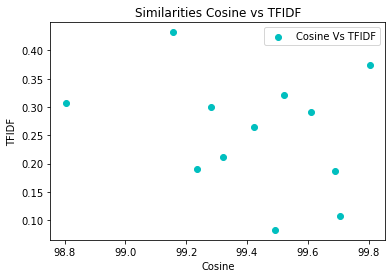

In [72]:
import matplotlib.pyplot as plt

plt.scatter(Cosine_score,tfidf_similarity,label="Cosine Vs TFIDF",color='c')

plt.legend()

plt.xlabel('Cosine')
plt.ylabel('TFIDF')
plt.title('Similarities Cosine vs TFIDF')

plt.show()


Cosine Similarity and TFIDF similarities for a same pair of dataset is better for Cosine similarity.